In [1]:
import pandas as pd
import numpy as np

## Hurricanes

In [2]:
canes = pd.read_csv('./hurricanes.csv')

In [3]:
ts = pd.read_csv('tropical_storms.csv')

In [4]:
canes.head()

,year,month,affected_states,state_1,state_2,state_3,state_4,state_5,state_6,state_7,category,mb_pressure,wind_kt,name
0,1851.0,Jun,"TX, C1",TX,NaN,NaN,NaN,NaN,NaN,NaN,1.0,974.0,80,-----
1,1851.0,Aug,"FL, NW3; I-GA, 1",FL,GA,NaN,NaN,NaN,NaN,NaN,3.0,955.0,100,"""Great Middle Florida"""
2,1852.0,Aug,"AL, 3; MS, 3; LA, 2; FL, SW2, NW1",AL,MS,LA,FL,NaN,NaN,NaN,3.0,961.0,100,"""Great Mobile"""
3,1852.0,Sep,"FL, SW1",FL,NaN,NaN,NaN,NaN,NaN,NaN,1.0,982.0,70,-----
4,1852.0,Oct,"FL, NW2; I-GA, 1",FL,GA,NaN,NaN,NaN,NaN,NaN,2.0,965.0,90,"""Middle Florida"""


In [5]:
ts.head()

,storm_number,date,time,lat_n,lon_w,max_winds(kt),landfall_state,storm_names
0,6,10/19/1851,1500,41.1,71.7,50,NY,NaN
1,3,8/19/1856,1100,34.8,76.4,50,NC,NaN
2,4,9/30/1857,1000,25.8,97.0,50,TX,NaN
3,3,9/14/1858,1500,27.6,82.7,60,FL,NaN
4,3,9/16/1858,300,35.2,75.2,50,NC,NaN


In [6]:
la = ts[ts['landfall_state'] == 'LA']

In [7]:
la.head()


,storm_number,date,time,lat_n,lon_w,max_winds(kt),landfall_state,storm_names
14,5,7/1865,0,29.7,92.0,60,LA,NaN
23,1,7/11/1872,500,29.1,89.1,50,LA,NaN
39,5,7/1879,500,29.0,89.2,50,LA,NaN
48,3,9/15/1882,500,29.8,93.7,50,LA,NaN
53,4,9/21/1885,300,29.0,89.4,50,LA,NaN


In [8]:
canes = canes.drop(columns=["affected_states", 'name'])

In [9]:
canes.head()

,year,month,state_1,state_2,state_3,state_4,state_5,state_6,state_7,category,mb_pressure,wind_kt
0,1851.0,Jun,TX,NaN,NaN,NaN,NaN,NaN,NaN,1.0,974.0,80
1,1851.0,Aug,FL,GA,NaN,NaN,NaN,NaN,NaN,3.0,955.0,100
2,1852.0,Aug,AL,MS,LA,FL,NaN,NaN,NaN,3.0,961.0,100
3,1852.0,Sep,FL,NaN,NaN,NaN,NaN,NaN,NaN,1.0,982.0,70
4,1852.0,Oct,FL,GA,NaN,NaN,NaN,NaN,NaN,2.0,965.0,90


In [10]:
canes['state_7'].value_counts()

MA    1
Name: state_7, dtype: int64

In [11]:
la1 = canes[canes["state_1"] == 'LA']

In [12]:
la2 = canes[canes["state_2"] == 'LA']

In [13]:
la3 = canes[canes["state_3"] == 'LA']

In [14]:
la4 = canes[canes["state_4"] == 'LA']

In [15]:
la1 = la1.drop(columns=['state_2', 'state_3', 'state_4', 'state_5', 'state_6', 'state_7'])


In [16]:
la2 = la2.drop(columns=['state_1', 'state_3', 'state_4', 'state_5', 'state_6', 'state_7'])


In [17]:
la3= la3.drop(columns=['state_1', 'state_2', 'state_4', 'state_5', 'state_6', 'state_7'])


In [18]:
la4= la4.drop(columns=['state_1', 'state_2', 'state_3', 'state_5', 'state_6', 'state_7'])


In [19]:
la1 = la1.rename(columns={"state_1": "state"})

In [20]:
la2 = la2.rename(columns={"state_2": "state"})

In [21]:
la3 = la3.rename(columns={"state_3": "state"})

In [22]:
la4 = la4.rename(columns={"state_4": "state"})

In [23]:
frames = [la1, la2, la3, la4]

louisiana = pd.concat(frames)

In [24]:
louisiana

,year,month,state,category,mb_pressure,wind_kt
9,1855.0,Sep,LA,3.0,945.0,110
10,1856.0,Aug,LA,4.0,934.0,130
16,1860.0,Aug,LA,3.0,945.0,110
17,1860.0,Sep,LA,2.0,965.0,90
18,1860.0,Oct,LA,2.0,965.0,90
...,...,...,...,...,...,...
278,2005.0,Sep,LA,3.0,937.0,100
280,2007.0,Sep,LA,1.0,985.0,80
283,2008.0,Sep,LA,2.0,950.0,95
2,1852.0,Aug,LA,3.0,961.0,100


In [25]:
louisiana["month"].value_counts()

Sep    27
Aug    17
Oct    12
Jul     4
Jun     3
Name: month, dtype: int64

In [26]:
louisiana.shape

(63, 6)

In [27]:
27/63

0.42857142857142855

percent of louisiana hurricanes in Septermber 42.88%

In [28]:
17/63

0.2698412698412698

percent of 

In [29]:
12/63

0.19047619047619047

## Tropical Storms

In [30]:
tropics = pd.read_csv('./Continental United States Tropical Storms Impacts:Landfalls 1851-1970, 1983-2021.csv')

In [31]:
tropics.head()

,storm #,date,time,lat_n,lon_w,max_winds(kt),landfall_state,storm_names
0,6,10/19/1851,1500Z,41.1,71.7,50,NY,NaN
1,3,8/19/1856,1100Z,34.8,76.4,50,NC,NaN
2,4,9/30/1857$,1000Z,25.8,97.0,50,TX,NaN
3,3,9/14/1858$,1500Z,27.6,82.7,60,FL,NaN
4,3,9/16/1858*,0300Z,35.2,75.2,50,NC,NaN


In [32]:
tropics = tropics.drop(columns=["storm #", 'lat_n', 'lon_w', 'time'])

In [33]:
tropics.head()

,date,max_winds(kt),landfall_state,storm_names
0,10/19/1851,50,NY,NaN
1,8/19/1856,50,NC,NaN
2,9/30/1857$,50,TX,NaN
3,9/14/1858$,60,FL,NaN
4,9/16/1858*,50,NC,NaN


In [34]:
la_tropics = tropics[tropics["landfall_state"] == 'LA']

In [35]:
la_tropics.shape

(49, 4)

In [36]:
tropical_s = pd.read_csv('tropical_storms.csv')

In [37]:
tropical_s.head()

,storm_number,date,time,lat_n,lon_w,max_winds(kt),landfall_state,storm_names
0,6,10/19/1851,1500,41.1,71.7,50,NY,NaN
1,3,8/19/1856,1100,34.8,76.4,50,NC,NaN
2,4,9/30/1857,1000,25.8,97.0,50,TX,NaN
3,3,9/14/1858,1500,27.6,82.7,60,FL,NaN
4,3,9/16/1858,300,35.2,75.2,50,NC,NaN


In [38]:
tropical_s.dtypes

storm_number        int64
date               object
time               object
lat_n             float64
lon_w             float64
max_winds(kt)       int64
landfall_state     object
storm_names        object
dtype: object

In [39]:
tropical_s.drop(columns=["storm_names", 'storm_number'])

,date,time,lat_n,lon_w,max_winds(kt),landfall_state
0,10/19/1851,1500,41.1,71.7,50,NY
1,8/19/1856,1100,34.8,76.4,50,NC
2,9/30/1857,1000,25.8,97.0,50,TX
3,9/14/1858,1500,27.6,82.7,60,FL
4,9/16/1858,300,35.2,75.2,50,NC
...,...,...,...,...,...,...
387,7/9/21,1630,41.4,71.7,50,RI
388,8/16/21,1900,29.7,85.4,55,FL
389,8/22/21,1520,41.2,71.6,55,RI
390,8/22/21,1615,41.3,71.8,55,RI


In [40]:
tropical_la = tropical_s[tropical_s["landfall_state"]=="LA"]

### Number of tropical storms to hit louisiana

In [41]:
tropical_la.value_counts()

storm_number  date      time  lat_n  lon_w  max_winds(kt)  landfall_state  storm_names
1             5/30/59   2200  29.6   91.6   55             LA              Arlene         1
5             9/5/58    1800  26.8   94.0   40             LA              Ella           1
14            10/10/04  1100  29.2   91.0   35             LA              Matthew        1
13            9/4/11    1030  29.6   92.1   40             LA              Lee            1
11            11/10/09  0     28.9   88.7   50             LA              Ida            1
10            9/26/02   600   29.1   90.3   55             LA              Isidore        1
9             9/14/02   800   29.1   89.1   50             LA              Hanna          1
              8/30/17   800   29.8   93.5   40             LA              Harvey         1
8             9/20/98   500   29.1   90.9   35             LA              Hermine        1
6             9/18/57   1200  29.2   90.9   55             LA              Esther    

In [42]:
tropical_la.value_counts().sum()

21

In [43]:
la.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 14 to 383
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   storm_number    49 non-null     int64  
 1   date            49 non-null     object 
 2   time            49 non-null     object 
 3   lat_n           49 non-null     float64
 4   lon_w           49 non-null     float64
 5   max_winds(kt)   49 non-null     int64  
 6   landfall_state  49 non-null     object 
 7   storm_names     21 non-null     object 
dtypes: float64(2), int64(2), object(4)
memory usage: 3.4+ KB


In [44]:
la.head()

,storm_number,date,time,lat_n,lon_w,max_winds(kt),landfall_state,storm_names
14,5,7/1865,0,29.7,92.0,60,LA,NaN
23,1,7/11/1872,500,29.1,89.1,50,LA,NaN
39,5,7/1879,500,29.0,89.2,50,LA,NaN
48,3,9/15/1882,500,29.8,93.7,50,LA,NaN
53,4,9/21/1885,300,29.0,89.4,50,LA,NaN


In [45]:
months = la['date']

In [46]:
month = []

for mon in months:
    month.append(mon[0])
    
    

In [47]:
month


['7',
 '7',
 '7',
 '9',
 '9',
 '9',
 '8',
 '9',
 '8',
 '9',
 '9',
 '9',
 '1',
 '7',
 '6',
 '6',
 '7',
 '9',
 '7',
 '9',
 '1',
 '1',
 '9',
 '9',
 '9',
 '9',
 '8',
 '9',
 '7',
 '8',
 '8',
 '6',
 '9',
 '9',
 '5',
 '9',
 '1',
 '9',
 '8',
 '9',
 '9',
 '6',
 '1',
 '1',
 '9',
 '6',
 '8',
 '6',
 '6']

In [48]:
la['month'] = month

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_67129/3411313911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la['month'] = month


In [49]:
la['month'] = pd.to_numeric(la['month'])

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_67129/4239912277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la['month'] = pd.to_numeric(la['month'])


In [50]:
la['month'].value_counts()

9    21
7     7
8     7
6     7
1     6
5     1
Name: month, dtype: int64

In [51]:
louisiana["month"].value_counts()

Sep    27
Aug    17
Oct    12
Jul     4
Jun     3
Name: month, dtype: int64

In [52]:
print(f'september: {21+27}')
print(f'August: {17+7}')
print(f'October: {12+5}')
print(f'July: {4+7}')
print(f'June: {3+7}')

september: 48
August: 24
October: 17
July: 11
June: 10


## Hurricanes and Tropical Storms
- September: 48
- August: 24
- October: 17
- July: 11
- June: 10


In [59]:
la.shape

(49, 9)

In [61]:
48/112

0.42857142857142855

In [62]:
17/112

0.15178571428571427

In [63]:
48+17

65

In [64]:
65/112

0.5803571428571429

63 hurricanes and 49 tropical storms

In [60]:
63 + 49

112

In [65]:
canes.shape

(305, 12)

In [67]:
ts.shape

(392, 8)

In [68]:
305+392

697

In [69]:
112/392

0.2857142857142857

In [70]:
112-65

47

## Of 697 Tropical Storms and Hurricanes to hit the USA, 112 hit Louisiana or 28.57%

## Of the 112 storms to hit Louisiana 65 hit in either September or October or 58.03%

- September: 48
- August: 24
- October: 17
- July: 11
- June: 10


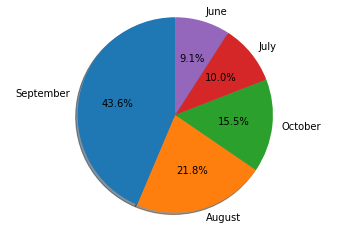

In [76]:
 import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'September', 'August', 'October', 'July', 'June'
sizes = [48, 24, 17, 11, 10]
explode = (0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()